# Syria Tel Customers

**Author:** Bridget Coleman
***

## Overview

Syria Tel is a communications company.  A company can expect a certain amount of turnover in custumers.  I examined the percentage of turnover and looked at reasons for why a customer may leave.

## Business Problem

It can be more expensive to get new clients versus retaining current clients.  The question is what makes a customer leave.  Can we predict when a customer is considering changing phone services?  What incentive can we give to make them reconsider?  

## Data Understanding

The data has been collected from Kaggle.  The dataset has the information from 3,333 customers.  The dataset has information on the length of account, types of plans, minutes charged, and if they terminated the service. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\bkcoleman1024\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.over_sampling import SMOTE, ADASYN

# Data Cleaning and Exploratory Data Analysis

In [5]:
telecom = pd.read_csv('telecom.csv')
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


I have imported the data and checked that it came in correctly.

In [6]:
telecom.shape

(3333, 21)

In [7]:
telecom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


This gives us an overview of the data.  All of the counts match what we expect.  This gives us the ranges of all of the features.  

I did search for information on the account length to see if it was in days or months.  Given the amounts for the day, evening, and night calls, days seems like the reasonable choice, but it does seem unusual that an accocunt would be open for less than a year with the shortest account only open for a day.

In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This gives us all of the columns as well as information regarding the data such as a number or string.

In [9]:
#Reformat column names

telecom.columns = [x.lower().replace(' ', '_') for x in telecom.columns]
telecom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


I reformatted the column names to make the information easier to work with. 

In [10]:
telecom.corr()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


This gives us the correlation of the data.  Since the churn rate is the focus, that is the column that I focused on most.  The total day minutes and customer service calls have the greatest correlations. 

In [11]:
telecom['churn'].unique()

array([False,  True])

Since the churn is the focus, this shows the values in this column.

In [12]:
#Number of true and false values in churn

telecom['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Out of the 3333 customers 14.49% decided to leave SyriaTel.

In [13]:
#Checking the number of unique states

telecom["area_code"].value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

There are only three area codes, but there are multiple states.  This is unusual. 

In [14]:
#Broken down by area codes.

print(telecom.groupby(['area_code'])['churn'].mean())

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


The churn percentage is consistent based on the area codes.  The phone numbers and area codes won't matter and so I will remove them.

In [15]:
#Checking the number of unique states

telecom['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
CO     66
WA     66
NV     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
telecom.groupby(['state'])['churn'].mean().sort_values(ascending = False)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

California, Texas, and New Jersey have the highest churn rates. 

In [17]:
telecom.drop(columns = 'phone_number', axis=1, inplace = True)
telecom.drop(columns = 'area_code', axis=1, inplace = True)
telecom.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
#How many unique values for customer service calls

telecom['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

Since there was a strong correlation between service calls and churn, I wanted to get additional information.

In [19]:
print(telecom.groupby(['customer_service_calls'])['churn'].mean())

customer_service_calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64


In [20]:
y = telecom['churn']
X = telecom.drop(columns='churn', axis=1)

In [21]:
random_state = 2021

I created a variable random_state if in case I want to change it to see if there are changes to my models.  

# Splitting the data

In [22]:
X_temp, X_hold_out, y_temp, y_hold_out = train_test_split(X, y, test_size = .25, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = .25, random_state=random_state)

I have separated the data.  The holdout will not be used until a model has been selected.  

# Models and Confusion Matrices

  Logistic Regression  
  K-nearest Neighbors  
  Decision Tree  
  Bagged Tree  
  Random Forest  
  
The focus will be on recall score.  A customer who was predicted to stay but then left would cost the company more.  This would be a missed opportunity for SyriaTel.


In [36]:
number_selector = make_column_selector(dtype_include='number')
string_selector = make_column_selector(dtype_include='object')
preprocessing = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), string_selector),
                                        (StandardScaler(), number_selector),
                                        remainder='passthrough')
logreg = LogisticRegression(random_state = random_state, max_iter = 1000)
pipeline = Pipeline([('preprocessing', preprocessing),
                     ('sm', SMOTE(random_state = random_state)),
                     ('lr', logreg)])
pipeline.fit(X_train, y_train)


train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

train_recall = recall_score(y_train, train_preds)
test_recall = recall_score(y_test, test_preds)
print('Logistic Regression Training Recall Score: {:.2f}'.format(train_recall))
print('Logistic Regression Testing Recall Score: {:.2f}'.format(test_recall))


Logistic Regression Training Recall Score: 0.76
Logistic Regression Testing Recall Score: 0.69


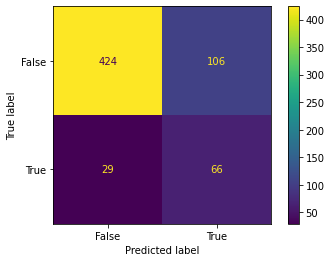

In [49]:
plot_confusion_matrix(pipeline, X_test, y_test);

For the Logistic Regression model decreases from the training to the testing set.  

Looking at the confusion matrix 4.6% of the predictions result in false negatives.

In [25]:
knn = KNeighborsClassifier()
pipeline_knn = Pipeline([('preprocessing', preprocessing),
                     ('sm', SMOTE(random_state = random_state)),
                     ('knn', knn)])
pipeline_knn.fit(X_train, y_train)


train_preds_knn = pipeline_knn.predict(X_train)
test_preds_knn = pipeline_knn.predict(X_test)

train_recall_knn = recall_score(y_train, train_preds_knn)
test_recall_knn = recall_score(y_test, test_preds_knn)
print('KNN Training Recall Score: {:.2f}'.format(train_recall_knn))
print('KNN Testing Recall Score: {:.2f}'.format(test_recall_knn))


KNN Training Recall Score: 0.99
KNN Testing Recall Score: 0.72


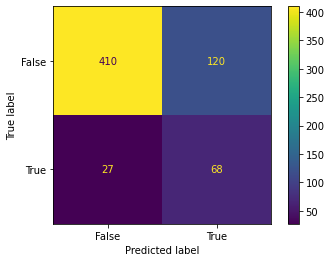

In [48]:
plot_confusion_matrix(pipeline_knn, X_test, y_test);

For the K-nearest Neighbor model decreases significantly from the training to the testing set.  

Looking at the confusion matrix 4.3% of the predictions result in false negatives.

In [27]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=random_state)

pipeline_tree_clf = Pipeline([('preprocessing', preprocessing),
                     ('sm', SMOTE(random_state = random_state)),
                     ('tree_clf', tree_clf)])
pipeline_tree_clf.fit(X_train, y_train)


train_preds_tree_clf = pipeline_tree_clf.predict(X_train)
test_preds_tree_clf = pipeline_tree_clf.predict(X_test)

train_recall_tree_clf = recall_score(y_train, train_preds_tree_clf)
test_recall_tree_clf = recall_score(y_test, test_preds_tree_clf)
print('Decision Tree Training Recall Score: {:.2f}'.format(train_recall_tree_clf))
print('Decision Tree Testing Recall Score: {:.2f}'.format(test_recall_tree_clf))


Decision Tree Training Recall Score: 0.83
Decision Tree Testing Recall Score: 0.78


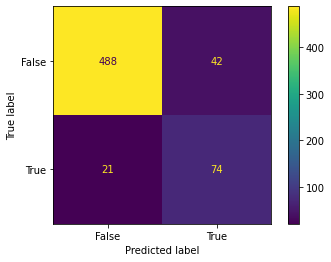

In [47]:
plot_confusion_matrix(pipeline_tree_clf, X_test, y_test);

For the Decision Tree model decreases from the training to the testing set, but it has preformed better than the first two models.

Looking at the confusion matrix 3.4% of the predictions result in false negatives.

In [29]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

pipeline_bagged_tree = Pipeline([('preprocessing', preprocessing),
                     ('sm', SMOTE(random_state = random_state)),
                     ('bagged_tree', bagged_tree)])
pipeline_bagged_tree.fit(X_train, y_train)


train_preds_bagged_tree = pipeline_bagged_tree.predict(X_train)
test_preds_bagged_tree = pipeline_bagged_tree.predict(X_test)

train_recall_bagged_tree = recall_score(y_train, train_preds_bagged_tree)
test_recall_bagged_tree = recall_score(y_test, test_preds_bagged_tree)
print('Bagged Tree Training Recall Score: {:.2f}'.format(train_recall_bagged_tree))
print('Bagged Tree Testing Recall Score: {:.2f}'.format(test_recall_bagged_tree))

Bagged Tree Training Recall Score: 0.82
Bagged Tree Testing Recall Score: 0.80


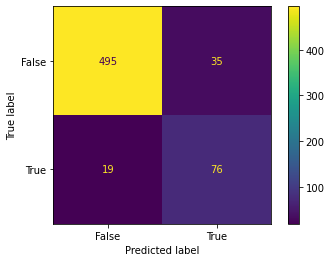

In [46]:
plot_confusion_matrix(pipeline_bagged_tree, X_test, y_test);

The Bagged Tree model is the best model so far.  

Looking at the confusion matrix 3.0% of the predictions result in false negatives.

In [31]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

pipeline_forest = Pipeline([('preprocessing', preprocessing),
                     ('sm', SMOTE(random_state = random_state)),
                     ('forest', forest)])
pipeline_forest.fit(X_train, y_train)


train_preds_forest = pipeline_forest.predict(X_train)
test_preds_forest = pipeline_forest.predict(X_test)

train_recall_forest = recall_score(y_train, train_preds_forest)
test_recall_forest = recall_score(y_test, test_preds_forest)
print('Random Forest Training Recall Score: {:.2f}'.format(train_recall_forest))
print('Random Forest Testing Recall Score: {:.2f}'.format(test_recall_forest))

Random Forest Training Recall Score: 0.82
Random Forest Testing Recall Score: 0.74


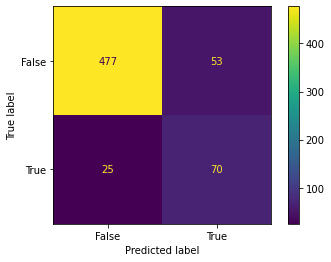

In [45]:
plot_confusion_matrix(pipeline_forest, X_test, y_test);

The Random Forest model performed well on the training data, but it was not as good on the testing data.  

Looking at the confusion matrix 4.0% of the predictions result in false negatives.  

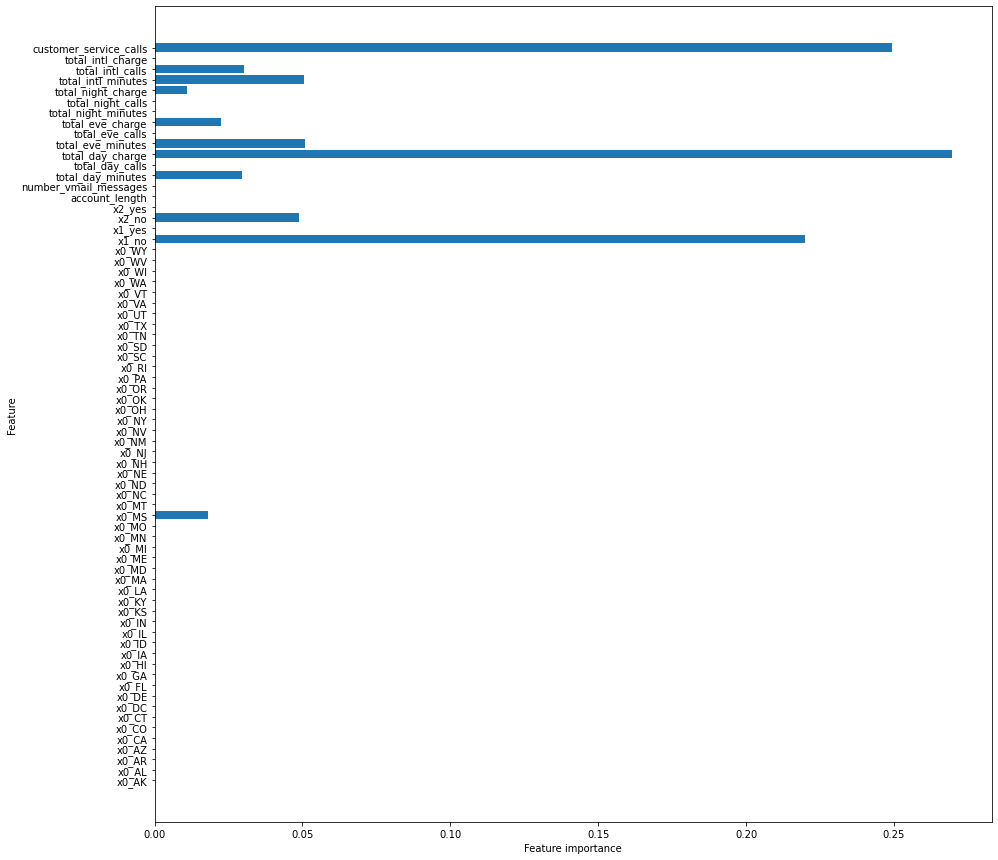

In [41]:
categoricals = list(preprocessing.transformers_[0][1].get_feature_names())
scaled = preprocessing.transformers_[1][2]
feature_names = categoricals + scaled
n_features = len(feature_names)

important_features = pipeline_tree_clf.steps[2][1].feature_importances_

plt.figure(figsize=(15,15))
plt.barh(range(n_features), important_features, align='center')
plt.yticks(np.arange(n_features), feature_names, fontsize = 10)
plt.xlabel('Feature importance')
plt.ylabel('Feature');

The Decision Tree model is a close second for the best model.  Feature importance is not available for the Bagged Tree model.  To get an idea about the important features, I chose the Decision Tree model to get an idea.  Based on this customer service calls, day charges and having an international plan are the most important features contributing to a churn rate.  This was also seen in the EDA section when I looked at the correlation.


# Results

The Bagged Tree Classifier provided the best results on the training data.  It did not do as well with the testing data.  The recall score decreased by 5% from the training data to the testing data.

In [34]:
holdout_preds_bagged_tree = pipeline_bagged_tree.predict(X_hold_out)

holdout_recall_bagged_tree = recall_score(y_hold_out, holdout_preds_bagged_tree)

print('Bagged Tree Testing Recall Score: {:.2f}'.format(holdout_recall_bagged_tree))

Bagged Tree Testing Recall Score: 0.84


The model actually did better with the holdout data than the training and testing sets.  This model is consistant.  Below are the results from the training and testing.  

Bagged Tree Training Recall Score: 0.82  
Bagged Tree Testing Recall Score: 0.80  

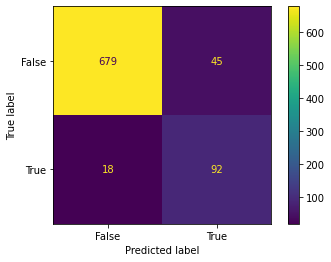

In [44]:
plot_confusion_matrix(pipeline_bagged_tree, X_hold_out, y_hold_out);

Looking at the confusion matrix 2.2% of the predictions result in false negatives. 

# Next Steps

There were a few items of note during the EDA which may help reduce customer churn.  Further investigation will be needed. 

- There are three states, California, New Jersey, and Texas, that have a higher churn rate than other states.  These states may provide more options for customers.

- As customer service calls increased, there was a greater chance of customer churn.  The company may be able to assist these customers sooner.

- Based on the feature importance charts, total day minutes and/or an international plan are a factor of churn.  Further investigation is needed in this area.